<a href="https://colab.research.google.com/github/TANMOY-MAITI/SIC_AI_Group_68/blob/main/Disease_diagnosis_from_patient_symptoms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Installing the kaggale module and the required Dataset

In [2]:
!pip install kaggle

In [3]:
!mkdir -p ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d kaushil268/disease-prediction-using-machine-learning

Dataset URL: https://www.kaggle.com/datasets/kaushil268/disease-prediction-using-machine-learning
License(s): DbCL-1.0
  0% 0.00/29.8k [00:00<?, ?B/s]
100% 29.8k/29.8k [00:00<00:00, 97.0MB/s]


In [5]:
!unzip disease-prediction-using-machine-learning.zip

Archive:  disease-prediction-using-machine-learning.zip
  inflating: Testing.csv             
  inflating: Training.csv            


Dataset Introduction :

Complete Dataset consists of 2 CSV files . One of them is training and other is for testing your model.

Each CSV file has 133 columns. 132 of these columns are symptoms that a person experiences and last column is the prognosis.

These symptoms are mapped to 42 diseases you can classify these set of symptoms to.

You are required to train your model on training data and test it on testing data


Reading and displaying Data

In [1]:
# importing
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

Training Set

In [7]:
df=pd.read_csv(r'/content/Training.csv')
df

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,muscle_wasting,vomiting,burning_micturition,spotting_ urination,fatigue,weight_gain,anxiety,cold_hands_and_feets,mood_swings,weight_loss,restlessness,lethargy,patches_in_throat,irregular_sugar_level,cough,high_fever,sunken_eyes,breathlessness,sweating,dehydration,indigestion,headache,yellowish_skin,dark_urine,nausea,loss_of_appetite,pain_behind_the_eyes,back_pain,constipation,abdominal_pain,diarrhoea,mild_fever,yellow_urine,yellowing_of_eyes,acute_liver_failure,fluid_overload,swelling_of_stomach,swelled_lymph_nodes,malaise,blurred_and_distorted_vision,phlegm,throat_irritation,redness_of_eyes,sinus_pressure,runny_nose,congestion,chest_pain,weakness_in_limbs,fast_heart_rate,pain_during_bowel_movements,pain_in_anal_region,bloody_stool,irritation_in_anus,neck_pain,dizziness,cramps,bruising,obesity,swollen_legs,swollen_blood_vessels,puffy_face_and_eyes,enlarged_thyroid,brittle_nails,swollen_extremeties,excessive_hunger,extra_marital_contacts,drying_and_tingling_lips,slurred_speech,knee_pain,hip_joint_pain,muscle_weakness,stiff_neck,swelling_joints,movement_stiffness,spinning_movements,loss_of_balance,unsteadiness,weakness_of_one_body_side,loss_of_smell,bladder_discomfort,foul_smell_of urine,continuous_feel_of_urine,passage_of_gases,internal_itching,toxic_look_(typhos),depression,irritability,muscle_pain,altered_sensorium,red_spots_over_body,belly_pain,abnormal_menstruation,dischromic _patches,watering_from_eyes,increased_appetite,polyuria,family_history,mucoid_sputum,rusty_sputum,lack_of_concentration,visual_disturbances,receiving_blood_transfusion,receiving_unsterile_injections,coma,stomach_bleeding,distention_of_abdomen,history_of_alcohol_consumption,fluid_overload.1,blood_in_sputum,prominent_veins_on_calf,palpitations,painful_walking,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

Testing Set

In [8]:
te=pd.read_csv(r'/content/Testing.csv')
te

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,muscle_wasting,vomiting,burning_micturition,spotting_ urination,fatigue,weight_gain,anxiety,cold_hands_and_feets,mood_swings,weight_loss,restlessness,lethargy,patches_in_throat,irregular_sugar_level,cough,high_fever,sunken_eyes,breathlessness,sweating,dehydration,indigestion,headache,yellowish_skin,dark_urine,nausea,loss_of_appetite,pain_behind_the_eyes,back_pain,constipation,abdominal_pain,diarrhoea,mild_fever,yellow_urine,yellowing_of_eyes,acute_liver_failure,fluid_overload,swelling_of_stomach,swelled_lymph_nodes,malaise,blurred_and_distorted_vision,phlegm,throat_irritation,redness_of_eyes,sinus_pressure,runny_nose,congestion,chest_pain,weakness_in_limbs,fast_heart_rate,pain_during_bowel_movements,pain_in_anal_region,bloody_stool,irritation_in_anus,neck_pain,dizziness,cramps,bruising,obesity,swollen_legs,swollen_blood_vessels,puffy_face_and_eyes,enlarged_thyroid,brittle_nails,swollen_extremeties,excessive_hunger,extra_marital_contacts,drying_and_tingling_lips,slurred_speech,knee_pain,hip_joint_pain,muscle_weakness,stiff_neck,swelling_joints,movement_stiffness,spinning_movements,loss_of_balance,unsteadiness,weakness_of_one_body_side,loss_of_smell,bladder_discomfort,foul_smell_of urine,continuous_feel_of_urine,passage_of_gases,internal_itching,toxic_look_(typhos),depression,irritability,muscle_pain,altered_sensorium,red_spots_over_body,belly_pain,abnormal_menstruation,dischromic _patches,watering_from_eyes,increased_appetite,polyuria,family_history,mucoid_sputum,rusty_sputum,lack_of_concentration,visual_disturbances,receiving_blood_transfusion,receiving_unsterile_injections,coma,stomach_bleeding,distention_of_abdomen,history_of_alcohol_consumption,fluid_overload.1,blood_in_sputum,prominent_veins_on_calf,palpitations,painful_walking,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Allergy
2,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,GERD
3,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Chronic cholestasis
4,1,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Drug Reaction
5,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Peptic ulcer diseae
6,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

Data Preprocessing and Visualization

In [13]:
# importing
import seaborn as sns
import matplotlib.pyplot as plt

Testing Set

In [9]:
# Dropping the 134th column which is unwanted
df = df.drop(df.columns[133], axis=1)

In [45]:
all_symptoms = [col for col in df.columns if col != 'prognosis']
print(all_symptoms)

['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing', 'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity', 'ulcers_on_tongue', 'muscle_wasting', 'vomiting', 'burning_micturition', 'spotting_ urination', 'fatigue', 'weight_gain', 'anxiety', 'cold_hands_and_feets', 'mood_swings', 'weight_loss', 'restlessness', 'lethargy', 'patches_in_throat', 'irregular_sugar_level', 'cough', 'high_fever', 'sunken_eyes', 'breathlessness', 'sweating', 'dehydration', 'indigestion', 'headache', 'yellowish_skin', 'dark_urine', 'nausea', 'loss_of_appetite', 'pain_behind_the_eyes', 'back_pain', 'constipation', 'abdominal_pain', 'diarrhoea', 'mild_fever', 'yellow_urine', 'yellowing_of_eyes', 'acute_liver_failure', 'fluid_overload', 'swelling_of_stomach', 'swelled_lymph_nodes', 'malaise', 'blurred_and_distorted_vision', 'phlegm', 'throat_irritation', 'redness_of_eyes', 'sinus_pressure', 'runny_nose', 'congestion', 'chest_pain', 'weakness_in_limbs', 'fast_heart_rate', 'pain_during_bow

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 5.0+ MB


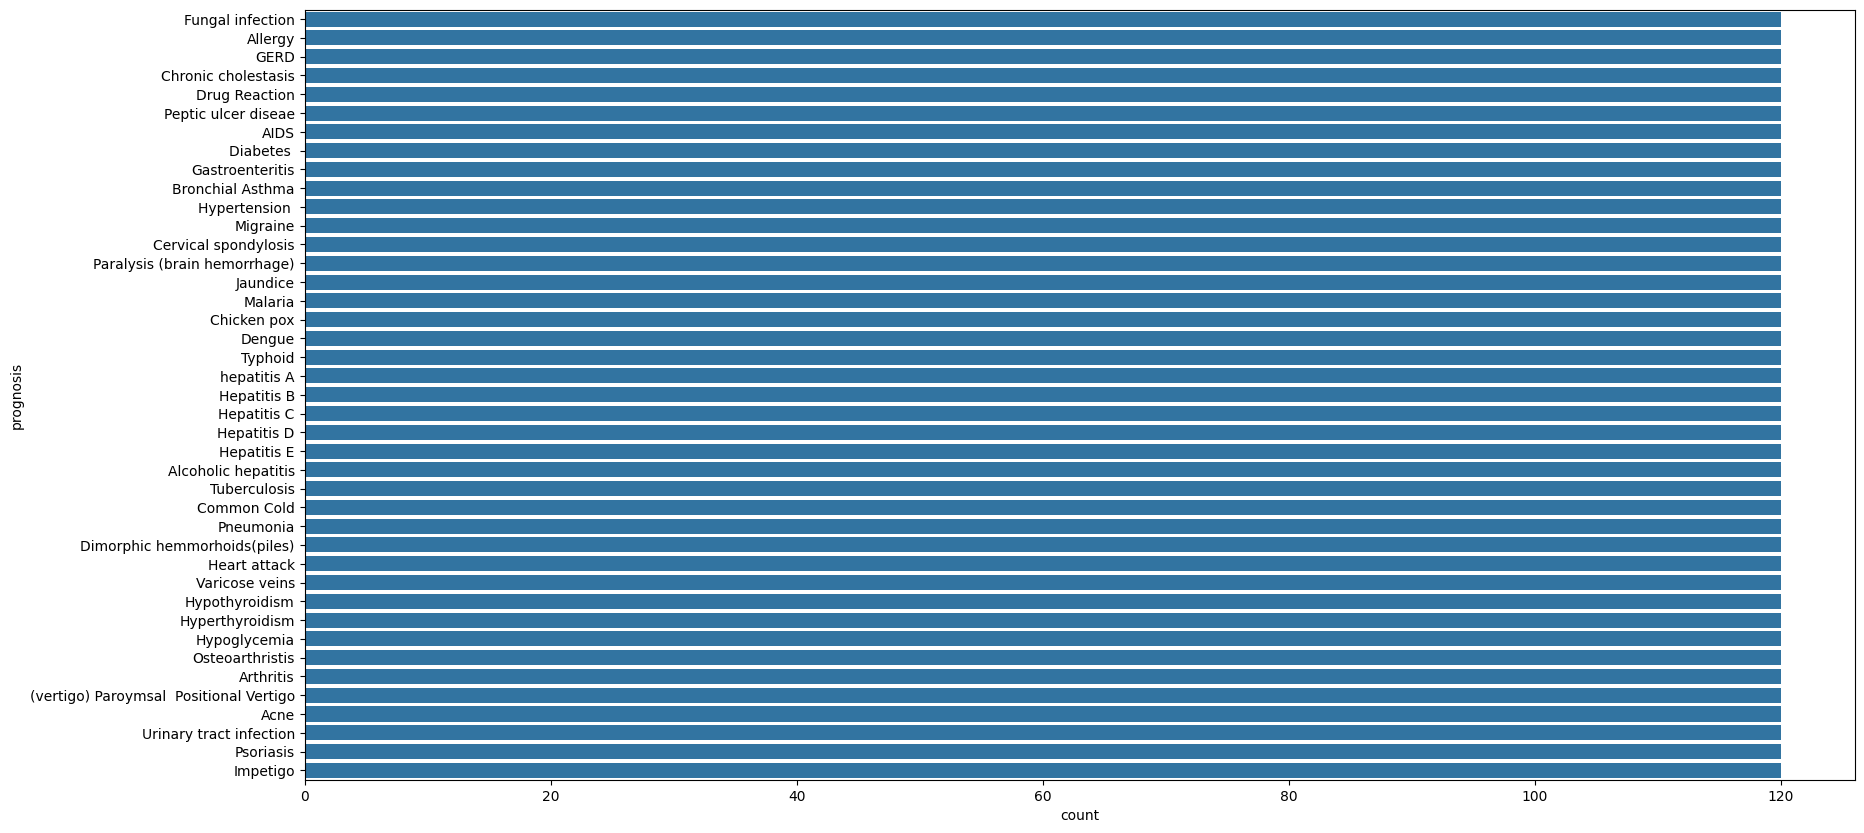

In [14]:
# Checking if our target vaiable is balanced
plt.figure(figsize=(20,10))
sns.countplot(data=df,y='prognosis')
plt.show()

In [15]:
# Perfectly balanced
# Let us check if there are any null values
[col for col in df.columns if df[col].isnull().any()]

[]

In [16]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 5.0+ MB


Testing Set

In [17]:
te.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 43.8+ KB


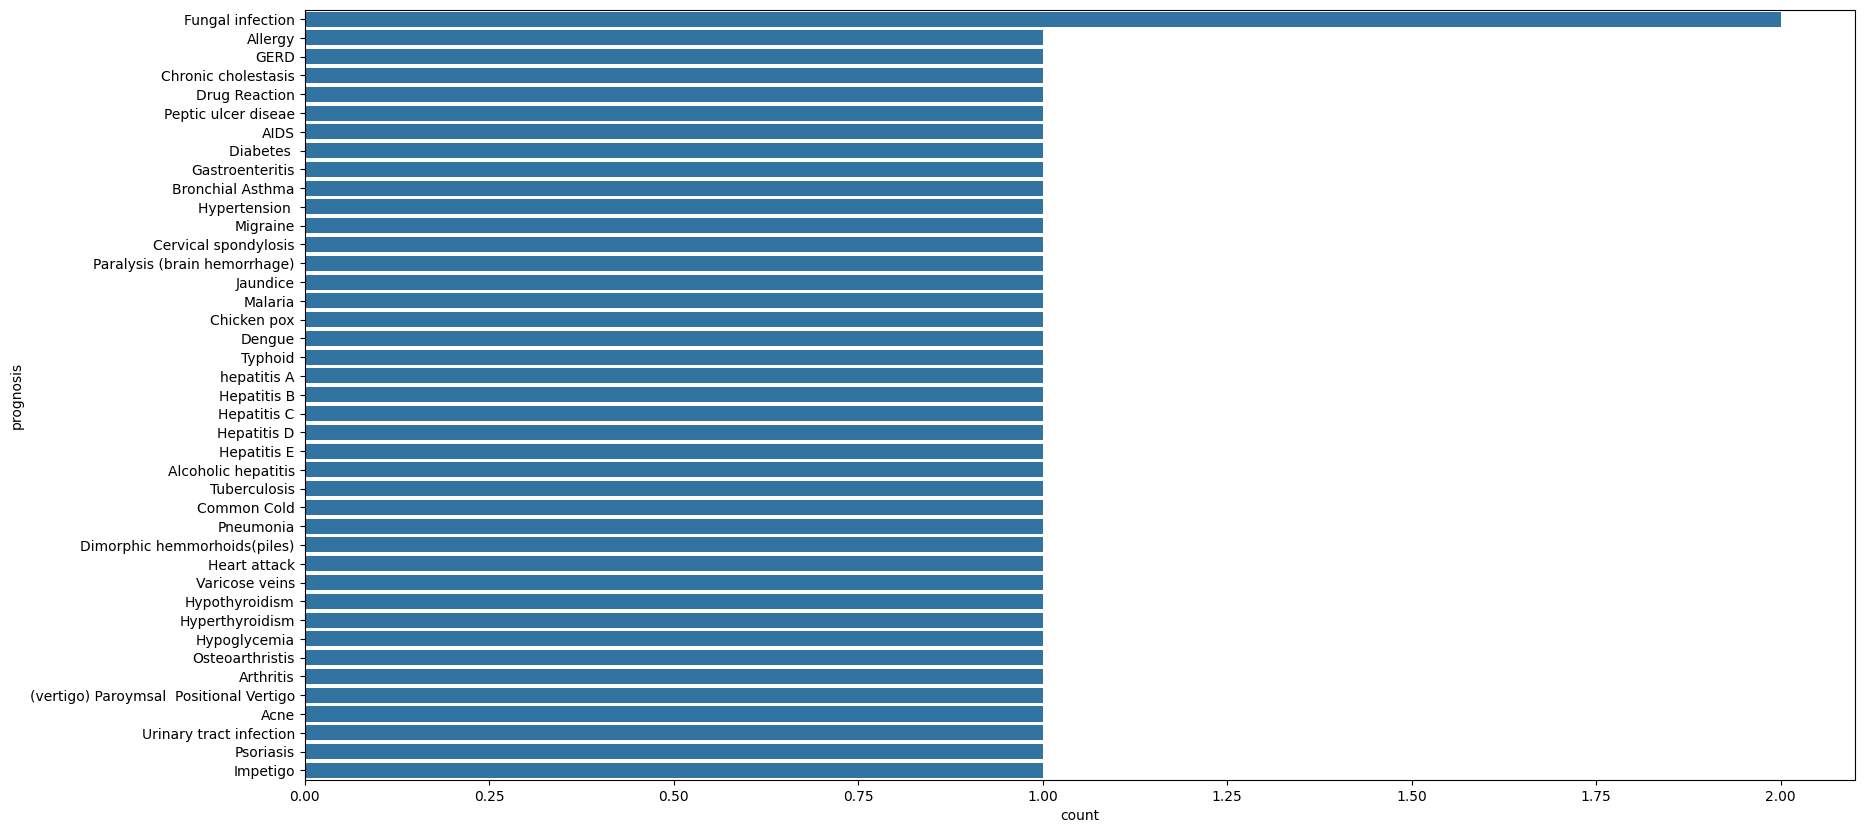

In [18]:
# Checking if our target vaiable is balanced
plt.figure(figsize=(20,10))
sns.countplot(data=te,y='prognosis')
plt.show()

Data Preoeration

Training Set

In [19]:
tdf=df.copy()
x=df.drop(columns='prognosis')
y=df['prognosis']

Testing Set

In [20]:
tte=te.copy()
x_te=te.drop(columns='prognosis')
y_te=te['prognosis']

In [21]:
print(x.shape,y.shape,x_te.shape,y_te.shape)

(4920, 132) (4920,) (42, 132) (42,)


Model

In [22]:
# importing
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,classification_report,roc_curve, auc,roc_auc_score

In [23]:
at=[]
a=[]
pt=[]
p=[]
rt=[]
r=[]
f1t=[]
f1=[]
crt=[]
cr=[]
cmt=[]
cm=[]
roc_auc_t=[]
roc_auc=[]

In [24]:
rf=RandomForestClassifier()
params={'criterion':['gini','entropy'],'min_samples_split':list(np.arange(2,31)),'min_samples_leaf':list(np.arange(2,51)),
       'n_estimators':[10]}
nrf=RandomizedSearchCV(rf,param_distributions=params,cv=10,n_jobs=-1,scoring='accuracy',random_state=20)
nrf.fit(x,y)
print(nrf.best_params_)
print(nrf.best_score_)
nrf=nrf.best_estimator_

{'n_estimators': 10, 'min_samples_split': np.int64(9), 'min_samples_leaf': np.int64(2), 'criterion': 'entropy'}
1.0


In [25]:
predt=nrf.predict(x)
pred=nrf.predict(x_te)

In [26]:
at.append(accuracy_score(y,predt))
a.append(accuracy_score(y_te,pred))
pt.append(precision_score(y, predt, average="weighted"))
p.append(precision_score(y_te, pred, average="weighted"))
rt.append(recall_score(y, predt, average="weighted"))
r.append(recall_score(y_te, pred, average="weighted"))
f1t.append(f1_score(y, predt, average="weighted"))
f1.append(f1_score(y_te, pred, average="weighted"))
crt.append(classification_report(y,predt))
cr.append(classification_report(y_te,pred))
cmt.append(confusion_matrix(y,predt))
cm.append(confusion_matrix(y_te,pred))

PCA

Principal Component Analysis (PCA) is a dimensionality reduction technique used to transform high-dimensional data into a lower-dimensional space while retaining as much variance as possible. It works by finding new axes, called principal components, which are linear combinations of the original features. These components are ranked based on the amount of variance they capture, allowing us to reduce the number of features while preserving the most important information. Since PCA removes correlations between features, it is especially useful for improving model performance and reducing overfitting in machine learning tasks. However, PCA is an unsupervised technique, meaning it does not consider the target variable when selecting components.

The process of PCA involves standardizing the data, computing the covariance matrix, finding its eigenvalues and eigenvectors, and then projecting the data onto the top k principal components (where k is the number of dimensions you choose). The explained variance ratio helps determine how much information each component retains, guiding the choice of the optimal number of components. While PCA improves efficiency by reducing dimensionality, it can also lead to information loss if too many features are removed. Therefore, it’s essential to balance dimensionality reduction with maintaining predictive power when applying PCA.

In [27]:
# importing
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

Training Data

In [28]:
ttdf=tdf.copy()
tdf_numeric = tdf.select_dtypes(include=[np.number])
tdf_numeric = tdf_numeric.fillna(tdf_numeric.mean())
scaler = StandardScaler()
tdf_scaled = scaler.fit_transform(tdf_numeric)

In [29]:
pca = PCA(n_components=65)
tdf_pca = pca.fit_transform(tdf_scaled)
tdf_pca = pd.DataFrame(tdf_pca, columns=[f'PC{i+1}' for i in range(65)])
print("Original shape:", tdf_numeric.shape)
kprint("Reduced shape:", tdf_pca.shape)


print("Explained Variance Ratio (first 10 PCs):", pca.explained_variance_ratio_[:10])
print("Total variance retained:", np.sum(pca.explained_variance_ratio_))

Original shape: (4920, 132)
Reduced shape: (4920, 65)
Explained Variance Ratio (first 10 PCs): [0.07350362 0.06640265 0.05207505 0.04829505 0.04327994 0.03763081
 0.03638701 0.03536861 0.03400703 0.03300662]
Total variance retained: 0.9808579231197446


In [30]:
tdf=tdf_pca.copy() # New training dataframe

Testing Data

In [31]:
x_te = x_te.fillna(x_te.mean())
x_te_scaled = scaler.transform(x_te)
x_te_pca = pca.transform(x_te_scaled)
x_te_pca = pd.DataFrame(x_te_pca, columns=[f'PC{i+1}' for i in range(65)])

print("Original test shape:", x_te.shape)
print("Reduced test shape:", x_te_pca.shape)
# Here I will be using only .tranform as we must reatain the mean,variance and PC's which we found out in the training data

Original test shape: (42, 132)
Reduced test shape: (42, 65)


In [32]:
tx_te=x_te_pca.copy() # New testing Dataframe


Data Preparation (After PCA)

In [33]:
x=tdf
y=ttdf['prognosis']

In [34]:
print(x.shape,y.shape,tx_te.shape,y_te.shape)

(4920, 65) (4920,) (42, 65) (42,)


Model (After PCA)

In [35]:
rf=RandomForestClassifier()
params={'criterion':['gini','entropy'],'min_samples_split':list(np.arange(2,31)),'min_samples_leaf':list(np.arange(2,51)),
       'n_estimators':[10]}
nrf=RandomizedSearchCV(rf,param_distributions=params,cv=10,n_jobs=-1,scoring='accuracy',random_state=20)
nrf.fit(x,y)
print(nrf.best_params_)
print(nrf.best_score_)
nrf=nrf.best_estimator_

{'n_estimators': 10, 'min_samples_split': np.int64(30), 'min_samples_leaf': np.int64(39), 'criterion': 'entropy'}
1.0


In [36]:
predt=nrf.predict(x)
pred=nrf.predict(tx_te)

In [37]:
at.append(accuracy_score(y,predt))
a.append(accuracy_score(y_te,pred))
pt.append(precision_score(y, predt, average="weighted"))
p.append(precision_score(y_te, pred, average="weighted"))
rt.append(recall_score(y, predt, average="weighted"))
r.append(recall_score(y_te, pred, average="weighted"))
f1t.append(f1_score(y, predt, average="weighted"))
f1.append(f1_score(y_te, pred, average="weighted"))
crt.append(classification_report(y,predt))
cr.append(classification_report(y_te,pred))
cmt.append(confusion_matrix(y,predt))
cm.append(confusion_matrix(y_te,pred))

Evaluation Metrics



Training

Classification Report

In [38]:
mods=['without_pca','with_pca']
for m, c in zip(mods,crt):
    print(m,'\n',c,'\n\n')

without_pca 
                                          precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00       120
                                   AIDS       1.00      1.00      1.00       120
                                   Acne       1.00      1.00      1.00       120
                    Alcoholic hepatitis       1.00      1.00      1.00       120
                                Allergy       1.00      1.00      1.00       120
                              Arthritis       1.00      1.00      1.00       120
                       Bronchial Asthma       1.00      1.00      1.00       120
                   Cervical spondylosis       1.00      1.00      1.00       120
                            Chicken pox       1.00      1.00      1.00       120
                    Chronic cholestasis       1.00      1.00      1.00       120
                            Common Cold       1.00      1.00      1.00       120
             

Confusion Matrix

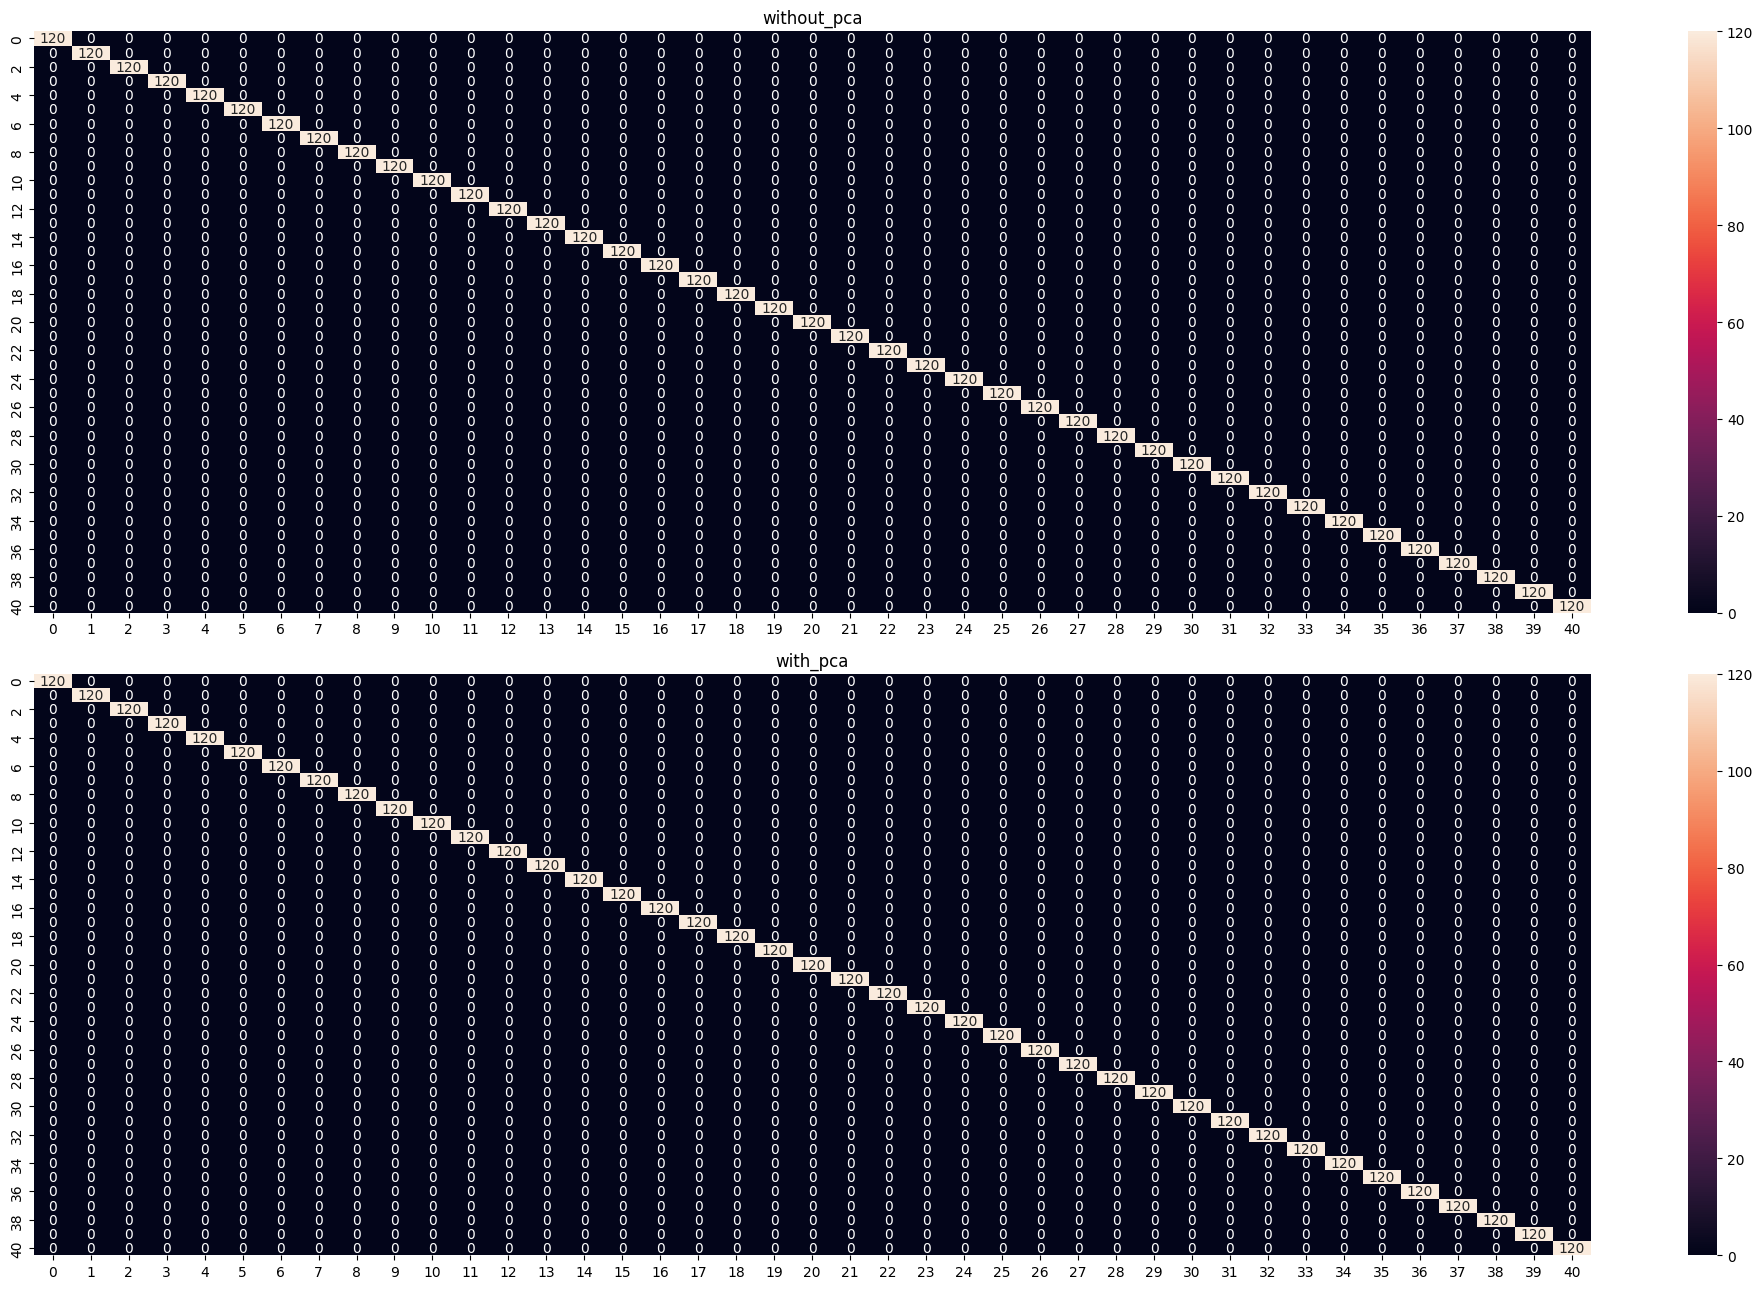

In [39]:
mods=['without_pca','with_pca']
fig,ax=plt.subplots(2,1,figsize=(20,13))
ax=ax.flatten()
i=0
for m,c in zip(mods,cmt):
    sns.heatmap(c,annot=True,ax=ax[i],fmt='d')
    ax[i].set_title(m)
    i+=1
plt.tight_layout()
plt.show()

Accuracy, Precision, Recall and F1 Score

In [40]:
mods=['without_pca','with_pca']
tr=pd.DataFrame({'Models':mods,'Accuracy':at,'Precision':pt,'Recall':rt,'F1 Score':f1t})
tr.sort_values(by=['Accuracy','Precision','Recall','F1 Score'],ascending=False)

,Models,Accuracy,Precision,Recall,F1 Score
0,without_pca,1.0,1.0,1.0,1.0
1,with_pca,1.0,1.0,1.0,1.0


Testing

Classification Report

In [41]:
mods=['without_pca','with_pca']
for m, c in zip(mods,cr):
    print(m,'\n',c,'\n\n')

without_pca 
                                          precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00         1
                                   AIDS       1.00      1.00      1.00         1
                                   Acne       1.00      1.00      1.00         1
                    Alcoholic hepatitis       1.00      1.00      1.00         1
                                Allergy       1.00      1.00      1.00         1
                              Arthritis       1.00      1.00      1.00         1
                       Bronchial Asthma       1.00      1.00      1.00         1
                   Cervical spondylosis       1.00      1.00      1.00         1
                            Chicken pox       1.00      1.00      1.00         1
                    Chronic cholestasis       1.00      1.00      1.00         1
                            Common Cold       1.00      1.00      1.00         1
             

Confusion Matrix

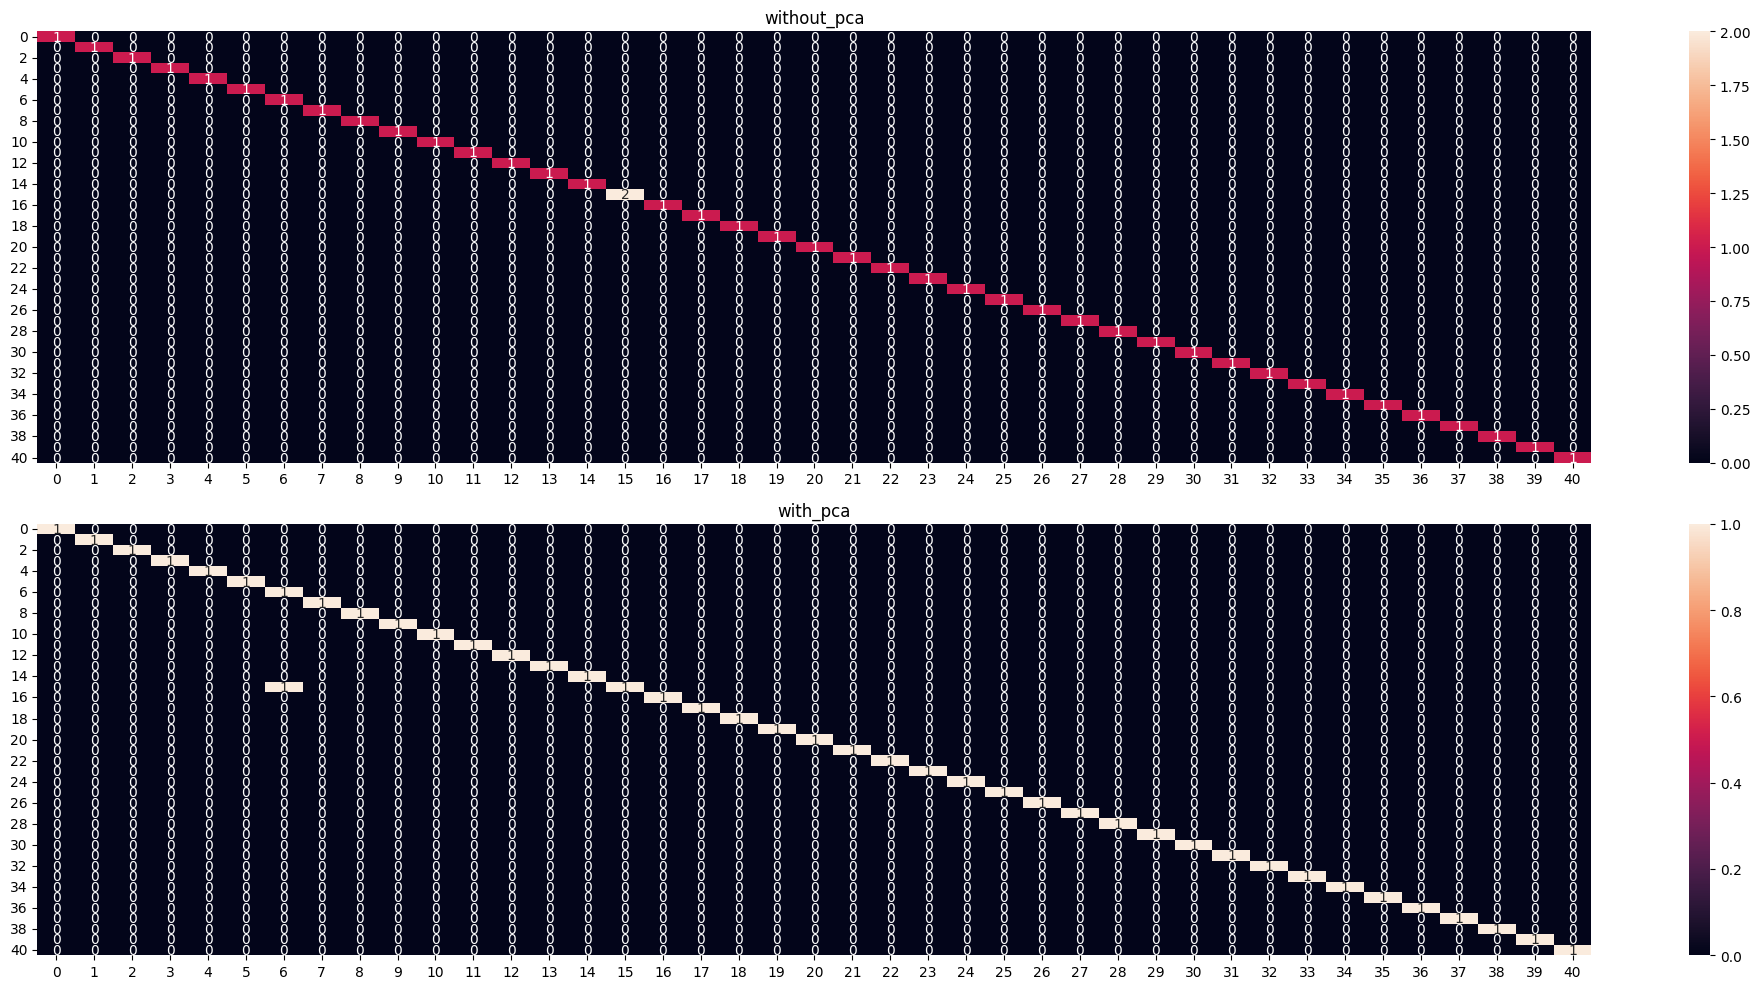

In [43]:
fig,ax=plt.subplots(2,1,figsize=(20,10))
ax=ax.flatten()
i=0
for m,c in zip(mods,cm):
    sns.heatmap(c,annot=True,ax=ax[i],fmt='d')
    ax[i].set_title(m)
    i+=1
plt.tight_layout()
plt.show()

Accuracy, Precision, Recall and F1 Score

In [44]:
mods=['without_pca','with_pca']
te=pd.DataFrame({'Models':mods,'Accuracy':a,'Precision':p,'Recall':r,'F1 Score':f1})
te.sort_values(by=['Accuracy','Precision','Recall','F1 Score'],ascending=False)

,Models,Accuracy,Precision,Recall,F1 Score
0,without_pca,1.00000,1.000000,1.00000,1.00000
1,with_pca,0.97619,0.988095,0.97619,0.97619


In [46]:
import joblib
joblib.dump(nrf, "disease_rf_model.pkl")
print("Model saved successfully!")


Model saved successfully!
